# QOL

In [7]:
save = False

# General Code

Computing eigenvalues. This can take a minute.
Smallest eigenvalue:  0.03804816742976095


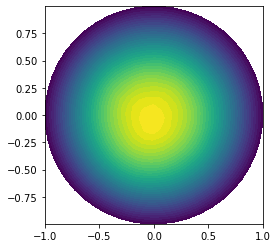

In [2]:
"""This program solves the Eigenvalue problem

    - div grad u(x, y) = labda u(x, y)

on the unit circle and boundary conditions given by

    u(x, y) = 0        
"""


from __future__ import print_function
from fenics import *
from mshr import *
import matplotlib.pyplot as plt

# Create mesh 
domain = Circle(Point(0, 0), 1) 
mesh = generate_mesh(domain, 16)

# Define function space
V_h = FunctionSpace(mesh, 'P', 1)

#############################################
# Define boundary conditions
#############################################

# define overall expression
u_D = Expression('1 - x[0]*x[0] - x[1]*x[1]', degree=3)

# define where the expression will be evaluated
def boundary(x, on_boundary):
    return on_boundary

# define the BC using the space and the function above
bc = DirichletBC(V_h, u_D, boundary)

#############################################
# Define variational problem
#############################################

# define trial space
u = TrialFunction(V_h)

# define test space
v = TestFunction(V_h)

# define the bilinear form
a = dot(grad(u),grad(v))*dx

#############################################
# Assemble the final matrix
#############################################

# define where to store the matrix
A = PETScMatrix()

# assemble the stiffness matrix and store in A
assemble(a, tensor=A)

# apply the boundary conditions
bc.apply(A)

#############################################
# Compute eigenvalues
#############################################

# define eigen solver
eigensolver = SLEPcEigenSolver(A)

# Compute all eigenvalues of A x = \lambda x
print("Computing eigenvalues. This can take a minute.")
eigensolver.solve()

#############################################
# Extract and plot eigenfunctions
#############################################
# Extract smallest (last) eigenpair
r, c, rx, cx = eigensolver.get_eigenpair(A.array().shape[0]-1)

# print eigenvalue
print("Smallest eigenvalue: ", r)

# Initialize function and assign eigenvector
u = Function(V_h)
u.vector()[:] = rx

# Plot eigenfunction
plot(u)
plt.show()

# Plot Eigenmodes

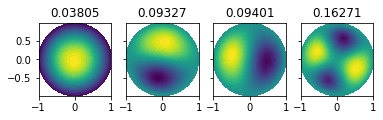

In [3]:
# Plot eigenmodes
n=4
fig,pl = plt.subplots(1,n)
for i in range(n):
    r, c, rx, cx = eigensolver.get_eigenpair(A.array().shape[0]-1-i)
    
    u = Function(V_h)
    u.vector()[:] = rx

    plt.axes(pl[i])
    
    pl[i].set(title=str(round(r,5)))
    if i != 0:
        pl[i].set_yticklabels([])
    plot(u)

if save:
    fig.savefig("Ba")
plt.show()

# Square vs Circle

In [12]:
def compare(domains, names, file="Bb", res=16, bins=50):
    data = []
    for i,domain in enumerate(domains):
        data.append([])

        # Create mesh
        mesh = generate_mesh(domain, res)

        # Define function space
        V_h = FunctionSpace(mesh, 'P', 1)

        # define overall expression
        u_D = Expression('1 - x[0]*x[0] - x[1]*x[1]', degree=3)

        # define where the expression will be evaluated
        def boundary(x, on_boundary):
            return on_boundary

        # define the BC using the space and the function above
        bc = DirichletBC(V_h, u_D, boundary)

        # define trial space
        u = TrialFunction(V_h)

        # define test space
        v = TestFunction(V_h)

        # define the bilinear form
        a = dot(grad(u),grad(v))*dx

        # define where to store the matrix
        A = PETScMatrix()

        # assemble the stiffness matrix and store in A
        assemble(a, tensor=A)

        # apply the boundary conditions
        bc.apply(A)

        # define eigen solver
        eigensolver = SLEPcEigenSolver(A)

        # Compute all eigenvalues of A x = \lambda x
        print("Computing eigenvalues. This can take a minute.")
        eigensolver.solve()

        # Extract all Eigenvalues
        for j in range(A.array().shape[0]-1):
            r,_,_,_ = eigensolver.get_eigenpair(j)
            data[i].append(r)

    fig,pl = plt.subplots(1,1)
    pl.hist(data[0],bins=bins,alpha=0.5,facecolor='#53b7d2',
            edgecolor='#08415d',linewidth=1,label=names[0])
    pl.hist(data[1],bins=bins,alpha=0.5,facecolor='#4d2e00',
            edgecolor='#1a0f00',linewidth=1,label=names[1])
    pl.set(title="Spectra of Given Domains")

    plt.legend()

    if save:
        fig.savefig(file)
    plt.show()

Computing eigenvalues. This can take a minute.
Computing eigenvalues. This can take a minute.


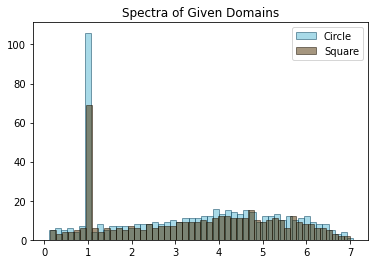

In [13]:
compare([Circle(Point(0, 0), 1),
         Rectangle(Point(-1,-1), Point(1,1))],
        ["Circle","Square"])

# Isospectral Domains

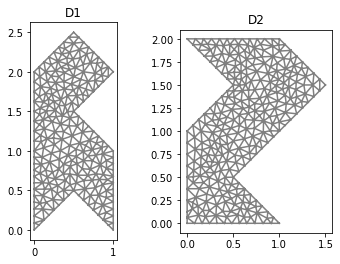

Computing eigenvalues. This can take a minute.
Computing eigenvalues. This can take a minute.


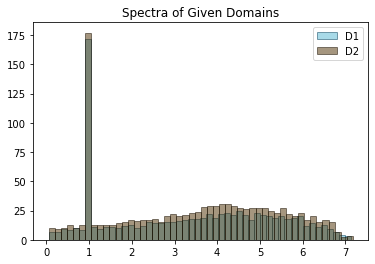

In [6]:
s1 = Rectangle(Point(0,0),Point(1,1))
s2 = Rectangle(Point(0,1),Point(1,2))

t1 = Polygon([Point(0,0),Point(1,0),Point(.5,.5)])
t2 = Polygon([Point(.5,1.5),Point(1,1),Point(1,2)])
t3 = Polygon([Point(0,2),Point(1,2),Point(.5,2.5)])

t4 = Polygon([Point(.5,.5),Point(1,0),Point(1,1)])
t5 = Polygon([Point(0,2),Point(0,1),Point(.5,1.5)])
t6 = Polygon([Point(1,2),Point(1,1),Point(1.5,1.5)])

d1 = s1+s2-t1-t2+t3
d2 = s1+s2-t4-t5+t6

fig,pl=plt.subplots(1,2)
plt.axes(pl[0])
plot(generate_mesh(d1,16))
pl[0].set(title="D1")
plt.axes(pl[1])
plot(generate_mesh(d2,16))
pl[1].set(title="D2")

# Ran at 32 for write-up
if save:
    fig.savefig("BcD")
plt.show()
compare([d1,d2],["D1","D2"],file="Bc",res=16)